# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units="metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # -------------------------------------------------------------------------------------------------------

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']["temp_max"]
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | boromo
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | nambucca heads
Processing Record 5 of Set 1 | gitega
Processing Record 6 of Set 1 | bopolu
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | sola
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | takanosu
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | arteche
Processing Record 18 of Set 1 | port augusta
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | kano
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | benguela
Processing Record 23 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,boromo,11.7500,-2.9333,31.75,56,62,2.81,BF,1728658530
1,hermanus,-34.4187,19.2345,19.89,75,83,3.63,ZA,1728658454
2,lebu,-37.6167,-73.6500,12.08,87,100,3.27,CL,1728658532
3,nambucca heads,-30.6500,153.0000,15.75,87,41,2.20,AU,1728658533
4,gitega,-3.5000,29.9500,19.14,77,86,3.23,BI,1728658535


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")



# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boromo,11.7500,-2.9333,31.75,56,62,2.81,BF,1728658530
1,hermanus,-34.4187,19.2345,19.89,75,83,3.63,ZA,1728658454
2,lebu,-37.6167,-73.6500,12.08,87,100,3.27,CL,1728658532
3,nambucca heads,-30.6500,153.0000,15.75,87,41,2.20,AU,1728658533
4,gitega,-3.5000,29.9500,19.14,77,86,3.23,BI,1728658535


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# Convert the 'Date' column to datetime if it's still a Unix timestamp
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')

# Extract the first entry and convert it to a string format
date_label = city_data_df.loc[0, 'Date']

# Convert to string format (YYYY-MM-DD)
date = date_label.strftime('%Y-%m-%d')

# Display the result
print(date)

2024-10-11


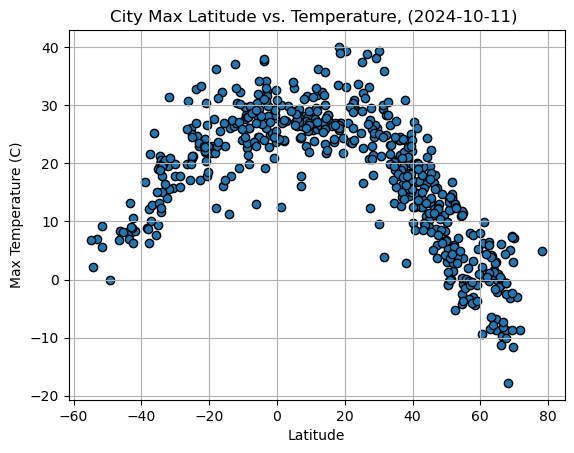

In [40]:
# Build scatter plot for latitude vs. temperature

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, edgecolor = 'black')
plt.title(f"City Max Latitude vs. Temperature, ({date}) ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

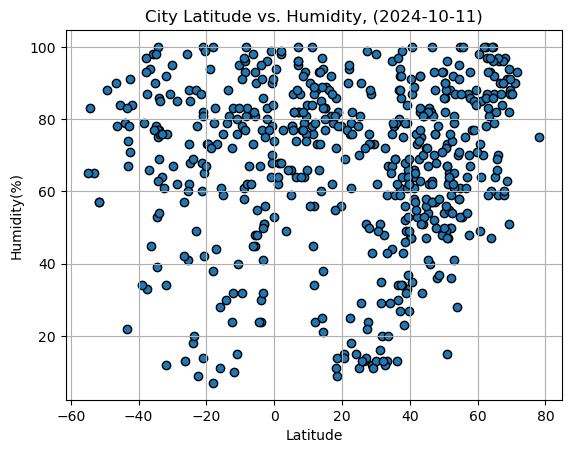

In [41]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

# YOUR CODE HERE
plt.scatter(x_axis, y_axis, edgecolor = 'black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Humidity, ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

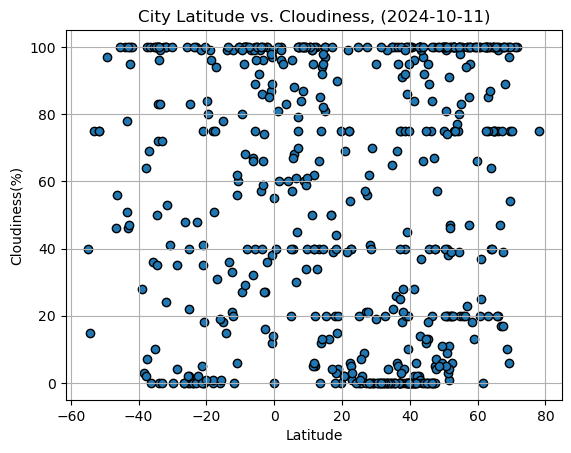

In [38]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
# YOUR CODE HERE
plt.scatter(x_axis, y_axis, edgecolor = 'black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Cloudiness, ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

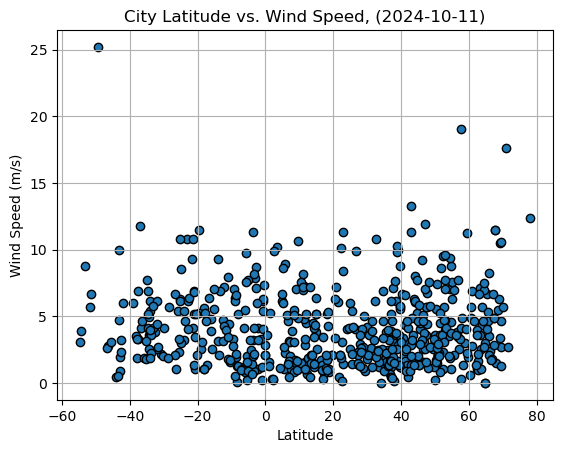

In [39]:
# Build the scatter plots for latitude vs. wind speed 
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
# YOUR CODE HERE
plt.scatter(x_axis, y_axis, edgecolor = 'black')


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Wind Speed, ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression(x_axis, y_axis):
    # Calculate regress values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    
    plt.scatter(x_axis, y_axis)    
    plt.plot(x_axis,regress_values,"r-")
    plt.xlabel("Latitude")
    plt.ylabel(y_axis.name)
    plt.title(f"Latitude vs {y_axis.name}")

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

     # Annotate the plot based on data ranges
    x_annotate = x_axis.min()  # Place annotation around the min of x values
    y_annotate = y_axis.max()  # Place annotation around the max of y values
    
    plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=13, color="red")
 
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boromo,11.7500,-2.9333,31.75,56,62,2.81,BF,2024-10-11 14:55:30
5,bopolu,7.0667,-10.4875,24.31,95,100,3.12,LR,2024-10-11 14:55:36
9,sitka,57.0531,-135.3300,7.94,87,100,2.57,US,2024-10-11 14:55:40
11,college,64.8569,-147.8028,-0.06,87,75,0.00,US,2024-10-11 14:55:43
12,takanosu,40.2219,140.3694,9.66,91,0,1.13,JP,2024-10-11 14:55:44


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,19.89,75,83,3.63,ZA,2024-10-11 14:54:14
2,lebu,-37.6167,-73.6500,12.08,87,100,3.27,CL,2024-10-11 14:55:32
3,nambucca heads,-30.6500,153.0000,15.75,87,41,2.20,AU,2024-10-11 14:55:33
4,gitega,-3.5000,29.9500,19.14,77,86,3.23,BI,2024-10-11 14:55:35
6,avarua,-21.2078,-159.7750,22.03,68,5,4.12,CK,2024-10-11 14:55:37


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7217591155699851


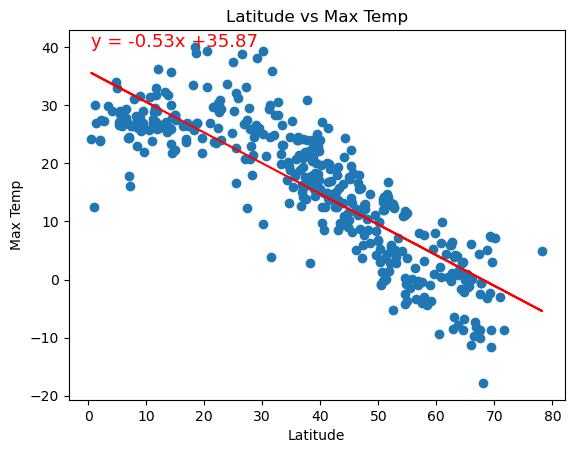

In [21]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.show()

The r^2-value is: 0.6057242969389423


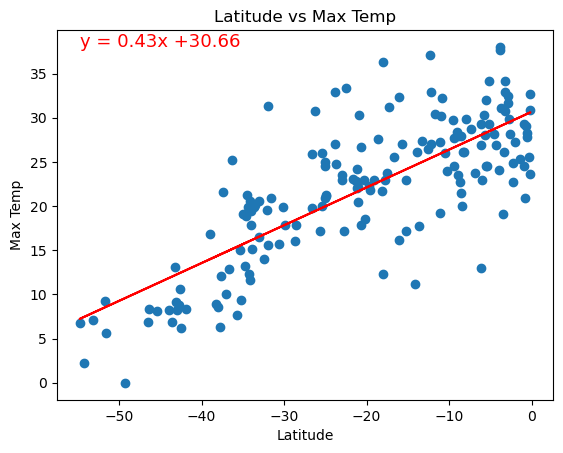

In [22]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [23]:
# NORTHERN HEMISPHERE: As the Latitude increases, the maximum temperature decreases. There is a negative correlation.
# SOUTHERN HEMISPHERE: As the Latitude increases, the maximum temperature increases. There is a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.00808783232459574


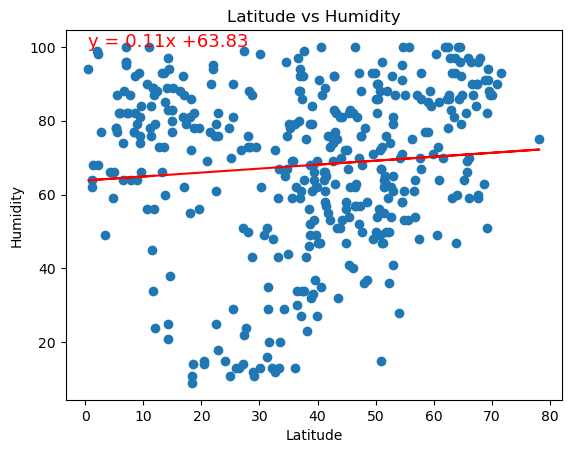

In [24]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.show()

The r^2-value is: 0.0036625944891455864


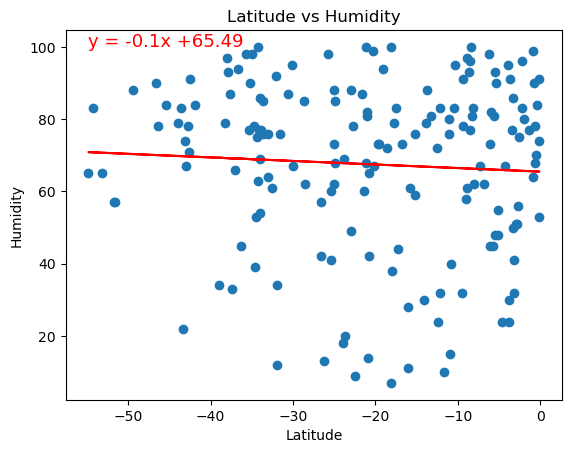

In [25]:
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [26]:
# There is no correlation between Latitude and Humidity in northern or Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.007133350262935145


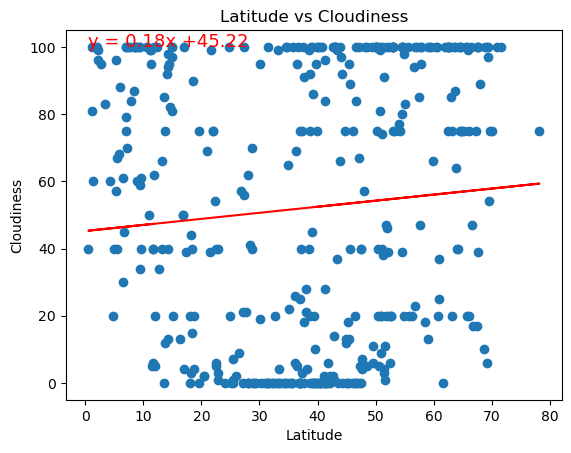

In [27]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.show()

The r^2-value is: 0.005417949245709686


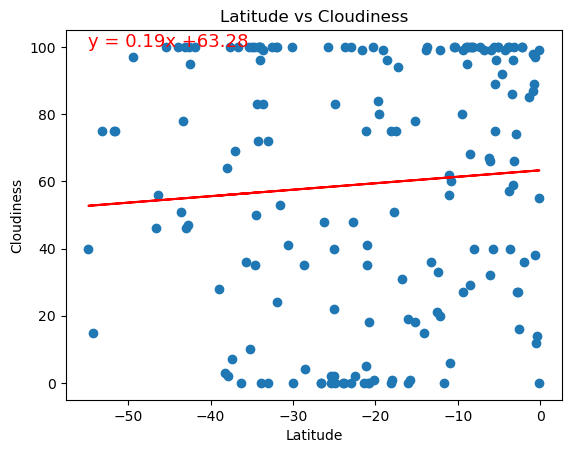

In [28]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [29]:
# There is no correlation between Latitude and Cloudiness in Northern or Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.02465617648900431


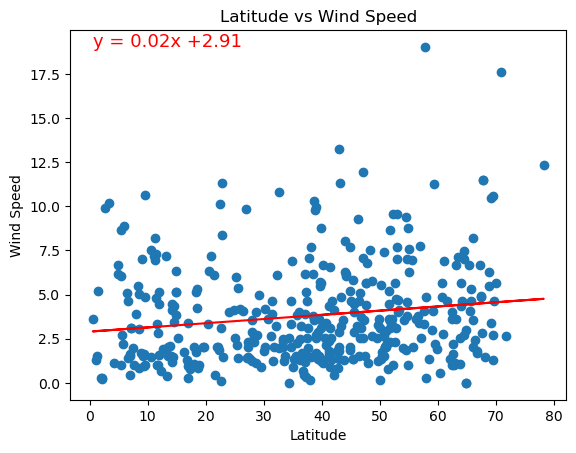

In [30]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.show()

The r^2-value is: 0.016698292784437196


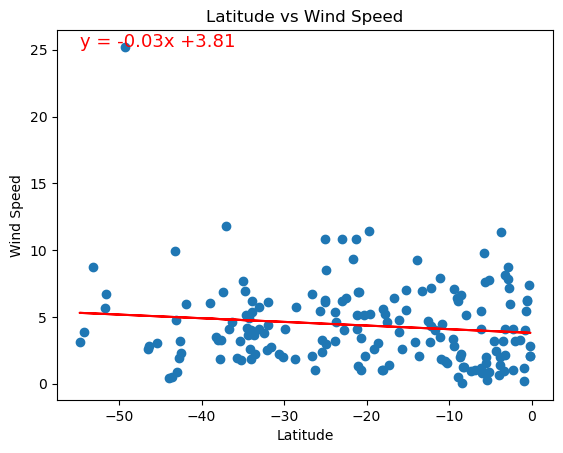

In [31]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [32]:
# There is no correlation between Latitude and Wind Speed in Northern or Southern Hemisphere.